In [159]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

In [160]:
warnings.filterwarnings('ignore')

## Plot functions

In [161]:
def draw_corr_mat(df):
    plt.figure(figsize=(10, 8))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

## Exploratory data analysis

In [162]:
df_x = pd.read_excel('data/X_4_12.xlsx', 
                   header=None)
df_y = pd.read_excel('data/Y_4_12.xlsx', 
                   header=None)

### X_4_12 data

In [163]:
df_x.head()

,0,1,2,3
0,0.713168,-1.155396,4.892525,-4.179356
1,0.180207,-0.951694,3.215496,-3.035290
2,-0.160125,-1.056572,2.849464,-3.009590
3,0.135208,-0.901885,2.976070,-2.840862
4,0.951132,-0.891886,4.577923,-3.626791


In [164]:
df_x.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,-1.041891,-1.023640,0.987137,-2.029028
std,2.724895,1.204667,2.710166,1.666720
min,-5.872689,-3.080677,-3.682738,-5.035222
25%,-3.138779,-1.932904,-1.184310,-3.369372
50%,-0.982649,-0.999337,0.944718,-2.040614
75%,1.035388,-0.066414,3.198369,-0.703692
max,3.930430,1.179921,5.905926,1.051648


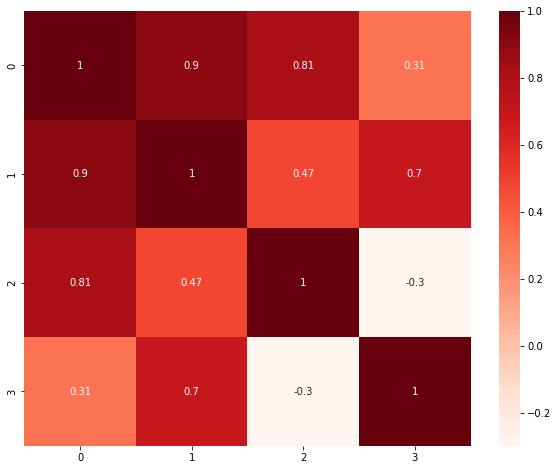

In [165]:
draw_corr_mat(df_x)

По корреляционной матрице явно видно, что некоторые признаки имеют сильную взаимную корреляцию. Таким образом понятно, что в данных могут быть выделены главные компоненты используя PCA

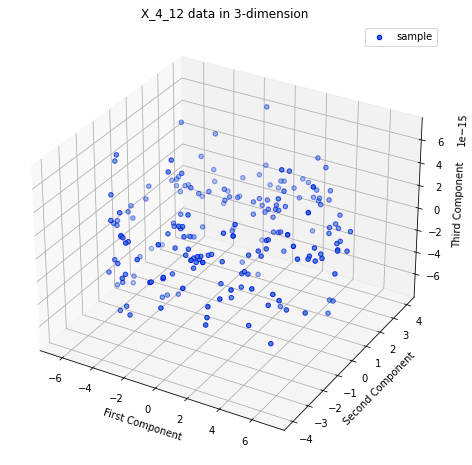

In [166]:
pca_x = PCA(n_components=3)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_x[:, 0], res_pca_x[:, 1], res_pca_x[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('X_4_12 data in 3-dimension')
plt.show()

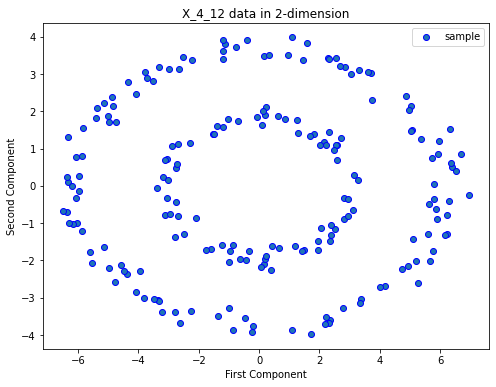

In [167]:
pca_x = PCA(n_components=2)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_x[:, 0], res_pca_x[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('X_4_12 data in 2-dimension')
plt.show()

#### **Вывод**

В X распределение однозначно тяжело сказать какое оптимальное количетсво кластеров. Но кажется, что данные должны быть разделены на две группы внешней и внутренней окружности.

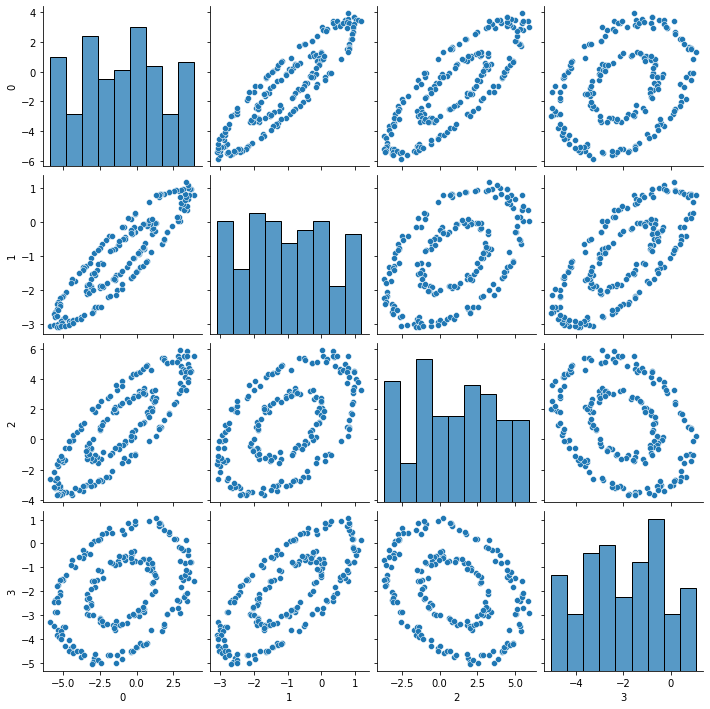

In [257]:
g = sns.pairplot(data=df_x,diag_kind="hist")

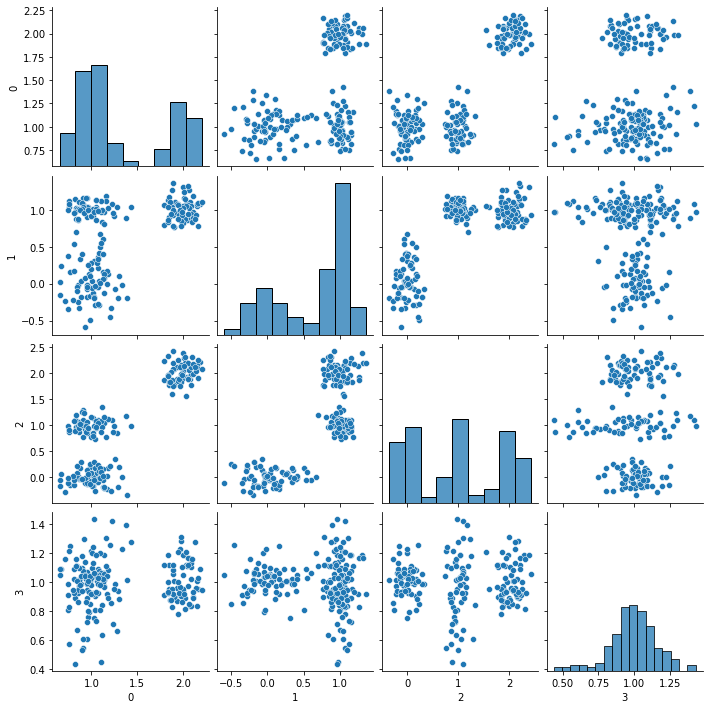

In [258]:
g = sns.pairplot(data=df_y,diag_kind="hist")

### Y_4_12 data

In [168]:
df_y.head()

,0,1,2,3
0,0.949997,-0.178492,-0.129891,1.067448
1,1.182598,0.124944,0.179682,1.080319
2,1.986758,0.917291,1.891755,0.942933
3,1.159683,1.187749,0.775773,1.105749
4,1.981371,0.926145,2.165250,1.282681


In [169]:
df_y.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,1.331577,0.647711,0.974792,0.991910
std,0.491012,0.504300,0.866040,0.165052
min,0.651068,-0.592140,-0.355696,0.435252
25%,0.951138,0.147654,0.068272,0.911239
50%,1.097644,0.908226,0.975041,1.002791
75%,1.899907,1.033586,1.881851,1.090635
max,2.203044,1.363924,2.427703,1.433292


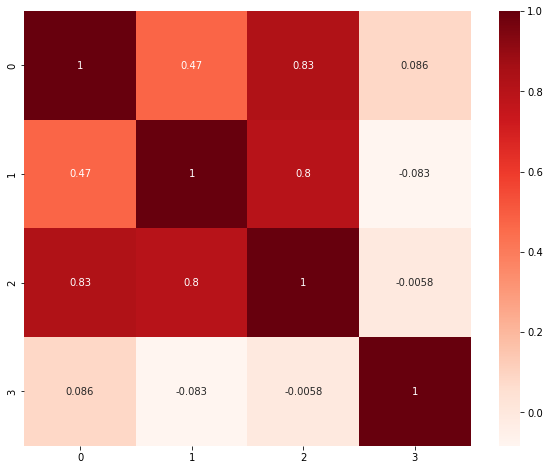

In [170]:
draw_corr_mat(df_y)

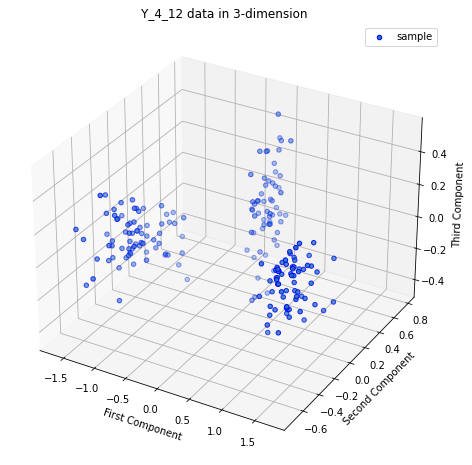

In [171]:
pca_y_3 = PCA(n_components=3)
pca_y_3.fit(df_y)
res_pca_y_3 = np.array(pca_y_3.transform(df_y))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_y_3[:, 0], res_pca_y_3[:, 1], res_pca_y_3[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('Y_4_12 data in 3-dimension')
plt.show()

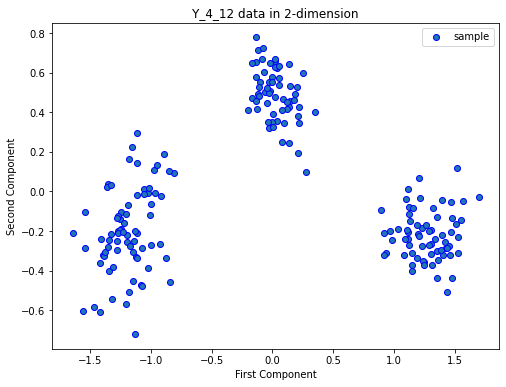

In [172]:
pca_y = PCA(n_components=2)
pca_y.fit(df_y)
res_pca_y = np.array(pca_y.transform(df_y))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_y[:, 0], res_pca_y[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('Y_4_12 data in 2-dimension')
plt.show()

#### **Вывод**

В Y достаточно легко **визуально можно разбить данных на 3 кластера**

## Data preparation

### 1. Distance matrix

**using Euclidian distance**

In [173]:
from scipy.spatial.distance import pdist,squareform

In [174]:
x_dist_matrix = pd.DataFrame(squareform(pdist(df_x, metric='euclidean')))
x_dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.108757,2.512938,2.421296,0.728263,1.319181,2.244050,2.028968,2.440083,2.263161,...,3.116683,1.226785,0.889753,2.923173,1.032964,0.654096,2.637002,0.396201,0.091691,2.562195
1,2.108757,0.000000,0.511336,0.315647,1.674510,2.735786,0.455636,0.426654,0.366568,0.419768,...,1.513200,1.979288,1.814030,1.038095,1.797528,1.727008,0.627657,1.946647,2.070634,0.453574
2,2.512938,0.511336,0.000000,0.394523,2.151865,3.234514,0.839563,0.902806,0.512725,0.788887,...,1.048953,2.156050,2.070751,0.529903,2.021513,2.045489,0.125641,2.296583,2.463507,0.360689
3,2.421296,0.315647,0.394523,0.000000,1.962001,2.995142,0.456640,0.564565,0.121992,0.404817,...,1.440685,2.266970,2.119028,0.895232,2.095807,2.040448,0.465500,2.262186,2.384605,0.145636
4,0.728263,1.674510,2.151865,1.962001,0.000000,1.125742,1.685251,1.475812,1.949912,1.715397,...,2.953135,1.642945,1.276253,2.633911,1.394676,0.992858,2.276783,0.918924,0.763427,2.107637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654096,1.727008,2.045489,2.040448,0.992858,1.914501,1.978755,1.775033,2.087618,1.983656,...,2.518303,0.652867,0.284821,2.392203,0.414301,0.000000,2.163333,0.286719,0.567374,2.169178
196,2.637002,0.627657,0.125641,0.465500,2.276783,3.357042,0.921229,1.003471,0.574171,0.869601,...,0.981989,2.255711,2.181693,0.430962,2.128473,2.163333,0.000000,2.416870,2.586914,0.393190
197,0.396201,1.946647,2.296583,2.262186,0.918924,1.704001,2.156946,1.946584,2.299464,2.167366,...,2.803135,0.833801,0.494032,2.662886,0.637342,0.286719,2.416870,0.000000,0.304728,2.395989
198,0.091691,2.070634,2.463507,2.384605,0.763427,1.408928,2.223292,2.008637,2.407622,2.240471,...,3.045830,1.135193,0.798544,2.864345,0.941805,0.567374,2.586914,0.304728,0.000000,2.524177


In [175]:
y_dist_matrix = pd.DataFrame(squareform(pdist(df_y, metric='euclidean')))
y_dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.492115,2.525503,1.652960,2.756438,2.552948,1.689578,0.609994,0.306482,0.271390,...,1.585133,0.104609,1.606179,2.787742,2.846895,1.518188,0.605135,2.807678,0.587028,2.570375
1,0.492115,0.000000,2.055373,1.219037,2.294209,2.079667,1.287592,0.259074,0.225263,0.424469,...,1.148329,0.425486,1.206050,2.332514,2.371148,1.093021,0.545214,2.360308,0.232892,2.100822
2,2.525503,2.055373,0.000000,1.424473,0.436276,0.236124,1.368513,2.062859,2.246169,2.384785,...,1.287747,2.443894,1.414368,0.368947,0.340722,1.317828,2.336320,0.459729,2.003707,0.198605
3,1.652960,1.219037,1.424473,0.000000,1.644859,1.368465,0.449530,1.053646,1.355204,1.475165,...,0.472737,1.617506,0.444690,1.706845,1.679250,0.428322,1.212319,1.726889,1.254761,1.373647
4,2.756438,2.294209,0.436276,1.644859,0.000000,0.620972,1.546104,2.303675,2.475070,2.630997,...,1.598754,2.675724,1.673210,0.306240,0.450947,1.560391,2.580508,0.423320,2.276792,0.451577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.518188,1.093021,1.317828,0.428322,1.560391,1.279091,0.290024,0.983738,1.220036,1.313021,...,0.316601,1.473463,0.211329,1.570259,1.619961,0.000000,1.133734,1.565922,1.105783,1.272242
196,0.605135,0.545214,2.336320,1.212319,2.580508,2.323226,1.273512,0.375707,0.448820,0.418785,...,1.200758,0.635405,1.166191,2.610144,2.650321,1.133734,0.000000,2.619329,0.654631,2.340541
197,2.807678,2.360308,0.459729,1.726889,0.423320,0.561322,1.567615,2.373919,2.531505,2.655540,...,1.584616,2.727883,1.649522,0.152663,0.505020,1.565922,2.619329,0.000000,2.318868,0.415540
198,0.587028,0.232892,2.003707,1.254761,2.276792,2.015954,1.337684,0.399092,0.391871,0.497984,...,1.104971,0.510686,1.207413,2.291395,2.315707,1.105783,0.654631,2.318868,0.000000,2.058198


### 2. Similarity matrix

In [176]:
import networkx as nx

In [177]:
def sim(x, y, sigma=0.5):
    similarity = math.exp(-(np.linalg.norm(x - y) ** 2) / (2 * sigma))
    return similarity

def compute_similarity_matrix(df):
    n = len(df)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sim_matrix[i,j] = sim(df.iloc[i,:], df.iloc[j,:]) 

    return pd.DataFrame(sim_matrix)

In [178]:
x_sim_matrix = compute_similarity_matrix(df_x)
x_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.011715,0.001809,0.002844,0.588389,0.175479,0.006501,0.016298,0.002595,0.005965,...,0.000060,0.222017,0.453092,0.000195,0.344034,0.651915,0.000955,0.854725,0.991628,0.001409
1,0.011715,1.000000,0.769923,0.905170,0.060568,0.000562,0.812529,0.833573,0.874265,0.838446,...,0.101289,0.019889,0.037228,0.340397,0.039514,0.050663,0.674386,0.022608,0.013739,0.814054
2,0.001809,0.769923,1.000000,0.855860,0.009750,0.000029,0.494174,0.442613,0.768829,0.536685,...,0.332770,0.009575,0.013732,0.755182,0.016798,0.015237,0.984338,0.005122,0.002314,0.878010
3,0.002844,0.905170,0.855860,1.000000,0.021291,0.000127,0.811784,0.727069,0.985228,0.848847,...,0.125485,0.005863,0.011218,0.448682,0.012371,0.015554,0.805179,0.005991,0.003392,0.979013
4,0.588389,0.060568,0.009750,0.021291,1.000000,0.281592,0.058421,0.113265,0.022323,0.052729,...,0.000163,0.067255,0.196160,0.000971,0.142970,0.373153,0.005607,0.429806,0.558321,0.011771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.651915,0.050663,0.015237,0.015554,0.373153,0.025596,0.019931,0.042820,0.012802,0.019548,...,0.001761,0.652963,0.922080,0.003271,0.842278,1.000000,0.009279,0.921081,0.724761,0.009047
196,0.000955,0.674386,0.984338,0.805179,0.005607,0.000013,0.427987,0.365330,0.719160,0.469444,...,0.381249,0.006169,0.008567,0.830499,0.010776,0.009279,1.000000,0.002905,0.001241,0.856759
197,0.854725,0.022608,0.005122,0.005991,0.429806,0.054824,0.009539,0.022614,0.005054,0.009118,...,0.000387,0.498963,0.783435,0.000833,0.666174,0.921081,0.002905,1.000000,0.911322,0.003212
198,0.991628,0.013739,0.002314,0.003392,0.558321,0.137370,0.007133,0.017692,0.003038,0.006606,...,0.000094,0.275639,0.528521,0.000273,0.411891,0.724761,0.001241,0.911322,1.000000,0.001710


In [179]:
G_x = nx.from_numpy_matrix(x_sim_matrix.to_numpy())

In [180]:
y_sim_matrix = compute_similarity_matrix(df_y)
y_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.784917,0.001698,0.065071,0.000501,0.001477,0.057575,0.689290,0.910346,0.928994,...,0.081053,0.989117,0.075788,0.000422,0.000302,0.099769,0.693372,0.000377,0.708503,0.001351
1,0.784917,1.000000,0.014632,0.226264,0.005178,0.013233,0.190540,0.935083,0.950523,0.835125,...,0.267494,0.834403,0.233504,0.004337,0.003616,0.302796,0.742852,0.003806,0.947206,0.012113
2,0.001698,0.014632,1.000000,0.131451,0.826681,0.945771,0.153688,0.014188,0.006440,0.003389,...,0.190464,0.002548,0.135276,0.872736,0.890394,0.176106,0.004260,0.809490,0.018046,0.961324
3,0.065071,0.226264,0.131451,1.000000,0.066833,0.153709,0.817032,0.329503,0.159362,0.113482,...,0.799731,0.073071,0.820576,0.054295,0.059613,0.832385,0.229990,0.050684,0.207126,0.151540
4,0.000501,0.005178,0.826681,0.066833,1.000000,0.680038,0.091590,0.004957,0.002185,0.000986,...,0.077614,0.000777,0.060832,0.910480,0.815990,0.087613,0.001282,0.835939,0.005607,0.815526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.099769,0.302796,0.176106,0.832385,0.087613,0.194743,0.919327,0.379940,0.225714,0.178347,...,0.904624,0.114053,0.956323,0.084948,0.072492,1.000000,0.276553,0.086112,0.294418,0.198176
196,0.693372,0.742852,0.004260,0.229990,0.001282,0.004528,0.197537,0.868354,0.817553,0.839138,...,0.236497,0.667818,0.256660,0.001100,0.000890,0.276553,1.000000,0.001048,0.651458,0.004177
197,0.000377,0.003806,0.809490,0.050684,0.835939,0.729729,0.085656,0.003569,0.001647,0.000866,...,0.081186,0.000586,0.065814,0.976963,0.774881,0.086112,0.001048,1.000000,0.004621,0.841412
198,0.708503,0.947206,0.018046,0.207126,0.005607,0.017179,0.167060,0.852762,0.857647,0.780369,...,0.294947,0.770435,0.232737,0.005245,0.004689,0.294418,0.651458,0.004621,1.000000,0.014463


In [181]:
G_y = nx.from_numpy_matrix(y_sim_matrix.to_numpy())

## 1. Clustering for the number of clusters k = 2

In [182]:
import networkx.algorithms.community as nx_comm
def compute_modularity(G, labels):
    min_cluster_num = min(labels)
    max_cluster_num = max(labels)
    dict_labels = {i: np.where(labels == i)[0] for i in range(min_cluster_num, max_cluster_num + 1)}
    array_labels = [dict_labels[i] for i in range(min_cluster_num, max_cluster_num + 1)]
    return nx_comm.modularity(G, array_labels)

In [183]:
def draw_clusters(first_component, second_component, clusters, distribution: str = "X"):
    plt.figure(figsize=(8, 6))
    plt.scatter(first_component, second_component, c=clusters)
    plt.title(f"{distribution}_4_12 data clusdering")
    plt.ylabel('Second Component')
    plt.xlabel('First Component')
    plt.show()

### k-means

In [184]:
from sklearn.cluster import KMeans

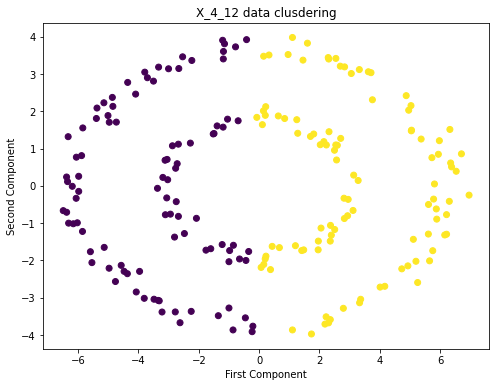

In [185]:
k_means_clusters_x = KMeans(n_clusters=2).fit_predict(df_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],k_means_clusters_x)

In [186]:
print('Modularity =', compute_modularity(G_x, k_means_clusters_x))

Modularity = 0.46661050997989617


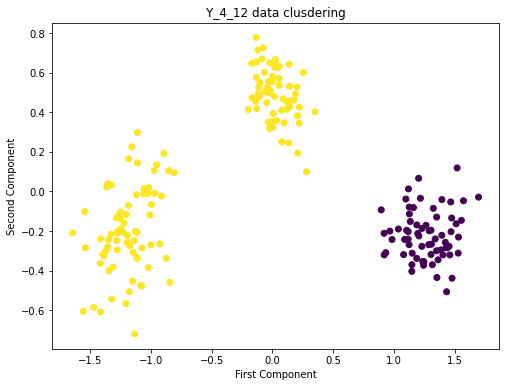

In [187]:
k_means_clusters_y = KMeans(n_clusters=2).fit_predict(df_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_y, distribution="Y")

In [188]:
print('Modularity =', compute_modularity(G_y, k_means_clusters_y))

Modularity = 0.3625791149942038


#### **Вывод**

В результате работы алгоритма K means на Y данных можно сделать очевидный вывод, что такое разбиение не является оптимальным, так как можно улучшить inertia одного из кластеров поделя его на два.
Результаты качества по оценки модулярности подтверждают эту гипотезу, данные X K means разбил лучше чем Y

In [189]:
df_x.head()

,0,1,2,3
0,0.713168,-1.155396,4.892525,-4.179356
1,0.180207,-0.951694,3.215496,-3.035290
2,-0.160125,-1.056572,2.849464,-3.009590
3,0.135208,-0.901885,2.976070,-2.840862
4,0.951132,-0.891886,4.577923,-3.626791


### EM algorithm

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


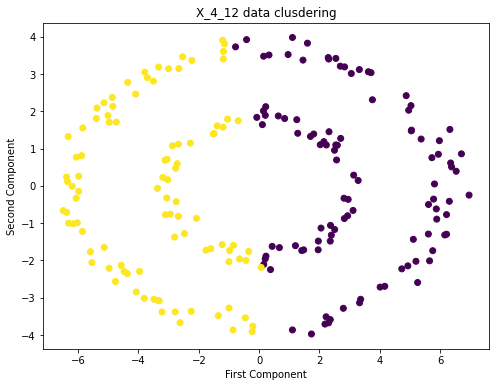

In [190]:
from sklearn.mixture import GaussianMixture
em_clusters_x = GaussianMixture(n_components=2, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_x)
print(em_clusters_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],em_clusters_x)

In [191]:
print('Modularity =', compute_modularity(G_x, em_clusters_x))

Modularity = 0.46045037889964613


[0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1]


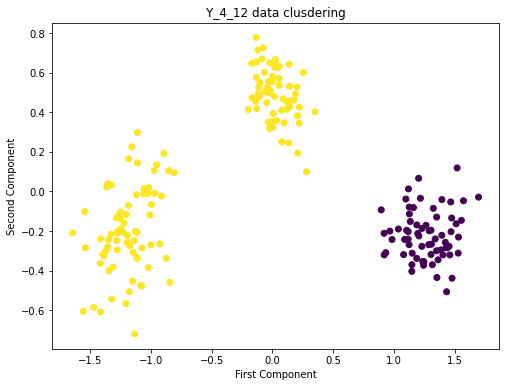

In [192]:
from sklearn.mixture import GaussianMixture
em_clusters_y = GaussianMixture(n_components=2, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_y)
print(em_clusters_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_y, distribution="Y")

In [193]:
print('Modularity =', compute_modularity(G_y, em_clusters_y))

Modularity = 0.3625791149942038


#### **Вывод**

Результаты EM алгоритма при разбиение на 2 кластера в обоих случаях близки к результатам K means

### Single Linkage

In [194]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

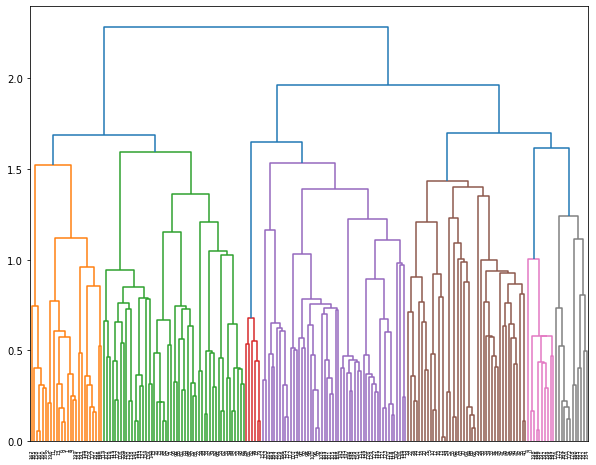

In [195]:
dendrogram_x = linkage(x_sim_matrix, 'single')
fig = plt.figure(figsize=(10, 8))
_ = dendrogram(dendrogram_x)
plt.show()

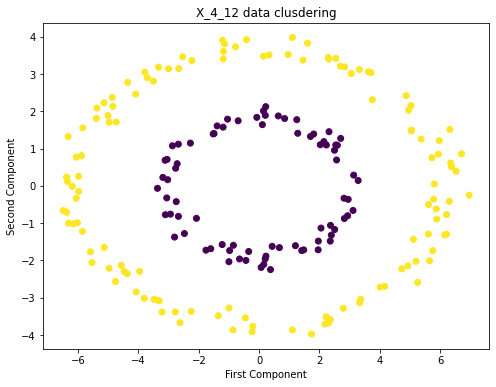

In [196]:
singlelinkage_clusters_x = fcluster(dendrogram_x, 2, criterion='distance')
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],singlelinkage_clusters_x)

In [198]:
print('Modularity =', compute_modularity(G_x, singlelinkage_clusters_x))

Modularity = 0.47774514266890533


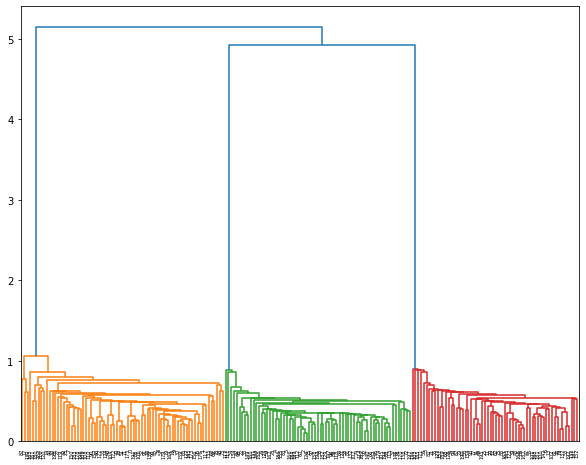

In [199]:
dendrogram_y = linkage(y_sim_matrix, 'single')
fig = plt.figure(figsize=(10, 8))
_ = dendrogram(dendrogram_y)
plt.show()

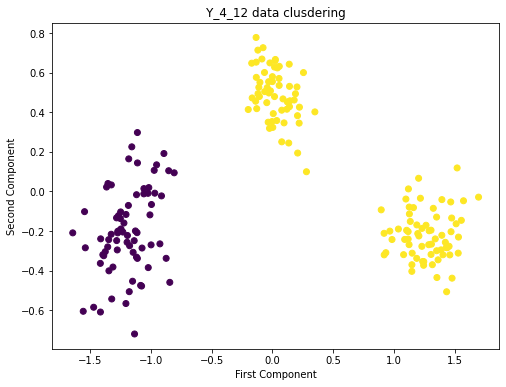

In [200]:
singlelinkage_clusters_y = fcluster(dendrogram_y, 5, criterion='distance')
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],singlelinkage_clusters_y, distribution="Y")

In [201]:
print('Modularity =', compute_modularity(G_y, singlelinkage_clusters_y))

Modularity = 0.3710325578101632


#### **Вывод**

Алгоритм Single Linkage лучше отработал на данных X и разбиение, которое получилось в результате отличается от тех, что выдавали EM и K means, значение модулярности говорит нам о том, что это разбиение лучше относительно двух предыдущих
Что касается данных Y отличий от работы EM и K means практически нет, и значение модуряности лишь немного лучше чем у двух предудыщих алгоритмов, что обусловлено тем, что в данных Y очевидно оптимальное числов кластеров больше чем 2.

### Spectral algorithm

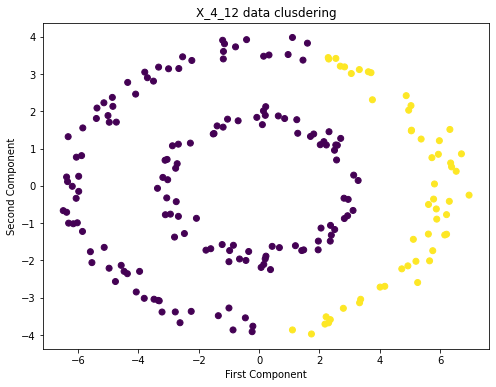

Modularity = 0.3601807604019667


In [286]:
from sklearn.cluster import SpectralClustering
spectral_clustering_x = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(x_sim_matrix)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],spectral_clustering_x)
print('Modularity =', compute_modularity(G_x, spectral_clustering_x))

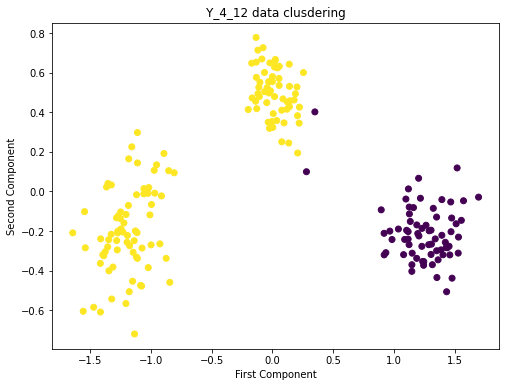

Modularity = 0.36089246990287394


In [287]:
spectral_clustering_y = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(y_sim_matrix)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],spectral_clustering_y, distribution="Y")
print('Modularity =', compute_modularity(G_y, spectral_clustering_y))

#### **Вывод**

Основываясь на результатах подсчета модулярности Spectral агоритм в совокупности двух наборов данных отработал хуже всего.

In [247]:
def get_rand_score(algos_results: dict, clusters_number: int = 2, distribution:str ="X"):
    combinations = itertools.combinations(algorithms_results, 2)
    scores = []
    print(f"Rand Score Computation for Clusterization {distribution} into {clusters_number} clusters\n")
    for algo_name_1, algo_name_2 in list(combinations):
        score = rand_score(algorithms_results[algo_name_1], algorithms_results[algo_name_2])
        scores.append((score, algo_name_1, algo_name_2))
    sorted_scores = sorted(scores, key = lambda x: x[0], reverse=True)
    for score, algo_name_1, algo_name_2 in sorted_scores:
        print(f"Rand Score between {algo_name_1} and {algo_name_2} is {score}")

 ## Сравнение работы алгоритмов с разбиением на 2 кластера, используя RAND score.

In [248]:
from sklearn.metrics.cluster import rand_score
import itertools
algorithms_results = {
    "EM": em_clusters_x,
    "Single Linkage": singlelinkage_clusters_x,
    "K Means": k_means_clusters_x,
    "Spectral": spectral_clustering_x,
}
get_rand_score(algos_results=algorithms_results)


Rand Score Computation for Clusterization X into 2 clusters

Rand Score between EM and K Means is 0.7895477386934673
Rand Score between Single Linkage and K Means is 0.6815577889447236
Rand Score between EM and Single Linkage is 0.6648743718592964
Rand Score between Single Linkage and Spectral is 0.6622110552763819
Rand Score between EM and Spectral is 0.618140703517588
Rand Score between K Means and Spectral is 0.5861809045226131


По результатам сравнение подтвердились гипотезы сделанные выше, основанные на визуальном разбиение и подсчете модулярности. Алгоритм EM и K Means разбили данные на два кластера наиболее похожим образом. А наибольшая разница между разбиением K Means и Spectral.

In [250]:
algorithms_results = {
    "EM": em_clusters_y,
    "Single Linkage": singlelinkage_clusters_y,
    "K Means": k_means_clusters_y,
    "Spectral": spectral_clustering_y,
}
get_rand_score(algos_results=algorithms_results, distribution="Y")

Rand Score Computation for Clusterization Y into 2 clusters

Rand Score between Single Linkage and K Means is 1.0
Rand Score between EM and Spectral is 0.9801005025125629
Rand Score between EM and Single Linkage is 0.7798994974874371
Rand Score between EM and K Means is 0.7798994974874371
Rand Score between Single Linkage and Spectral is 0.7746733668341709
Rand Score between K Means and Spectral is 0.7746733668341709


Так же подтвердилась гипотеза, что в данных Y разбиение на два кластера является не оптимальным и поэтому все алгоритмы отработали достаточно похоже между собой разделив данные на один большой и один маленький кластер.

## 2. Clustering for the number of clusters k = 3

### k-means

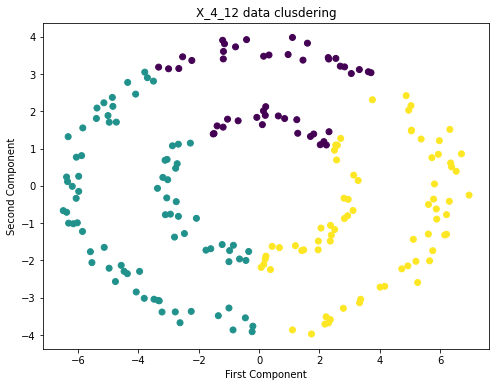

In [231]:
k_means_clusters_3_x = KMeans(n_clusters=3).fit_predict(df_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],k_means_clusters_3_x)

In [232]:
print('Modularity =', compute_modularity(G_x, k_means_clusters_3_x))

Modularity = 0.5813002812632266


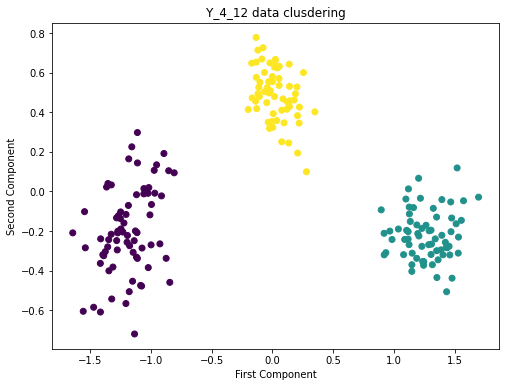

In [233]:
k_means_clusters_3_y = KMeans(n_clusters=3).fit_predict(df_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_3_y, distribution="Y")

In [234]:
print('Modularity =', compute_modularity(G_y, k_means_clusters_3_y))

Modularity = 0.4961736900027383


### Вывод
Первое, что можно заметить, что в случае 3 кластеров значение модулярности стало лучше относительно работы того же алгоритма на данных Y, это говорит, о том что предположение об оптимальном разбиение на более чем 2 кластера является правильным

### EM

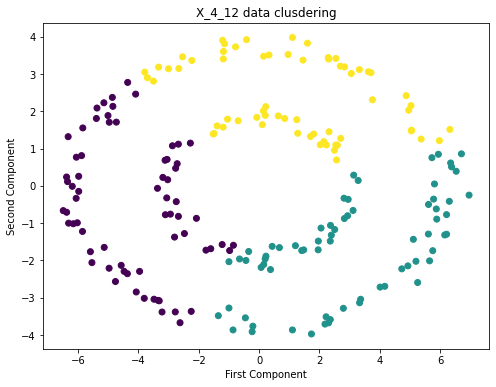

In [236]:
from sklearn.mixture import GaussianMixture
em_clusters_3_x = GaussianMixture(n_components=3, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1], em_clusters_3_x)

In [263]:
print('Modularity =', compute_modularity(G_x, em_clusters_3_x))

Modularity = 0.6091554201689277


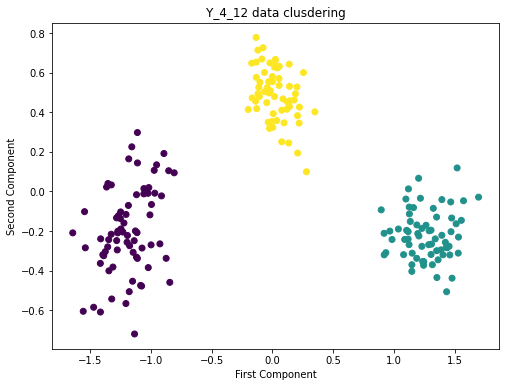

In [238]:
em_clusters_3_y = GaussianMixture(n_components=3, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1], em_clusters_3_y, "Y")

In [264]:
print('Modularity =', compute_modularity(G_y, em_clusters_3_y))

Modularity = 0.4961736900027383


### Вывод
Как и в случаях для двух кластеров результаты работы EM и К means близки между собой. В то же время, EM стал работать лучше относительно разбиения на два кластера основываясь на значение модуряности 

### Single Linkage

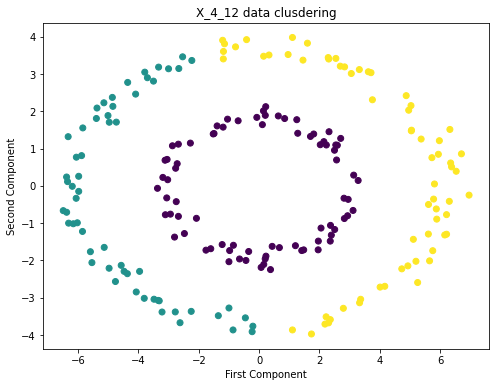

In [240]:
singlelinkage_clusters_3_x = fcluster(dendrogram_x, 1.9, criterion='distance')
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1], singlelinkage_clusters_3_x)

In [290]:
print('Modularity =', compute_modularity(G_x, singlelinkage_clusters_3_x))

Modularity = 0.6350033230814498


### Вывод
В случае с разбиением данных X на 3 кластера результат работы Single Linkage показывает лучшее значение модулярности среди всех алгоритмов.

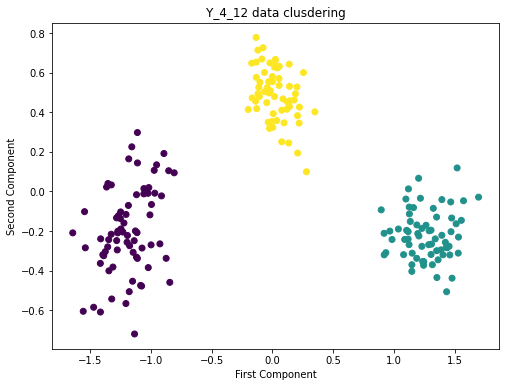

In [242]:
singlelinkage_clusters_3_y = fcluster(dendrogram_y, 4, criterion='distance')
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1], singlelinkage_clusters_3_y, distribution="Y")

In [293]:
print('Modularity =', compute_modularity(G_y, singlelinkage_clusters_3_y))

Modularity = 0.4961736900027383


### Spectral algorithm

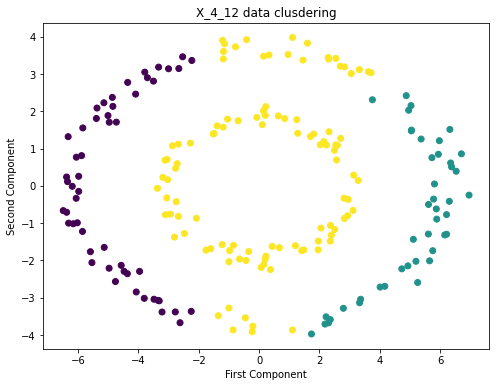

In [243]:
spectral_clustering_3_x = SpectralClustering(n_clusters=3,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(x_sim_matrix)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],spectral_clustering_3_x)

In [294]:
print('Modularity =', compute_modularity(G_x, spectral_clustering_3_x))

Modularity = 0.5840106542346086


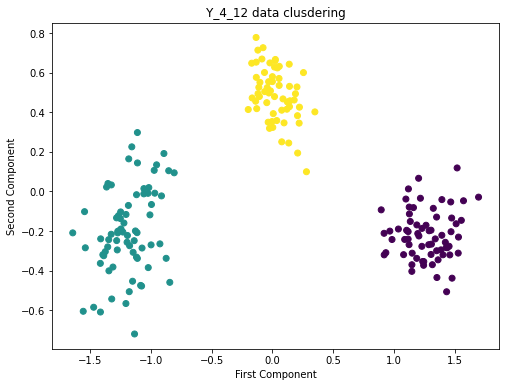

In [244]:
spectral_clustering_3_y = SpectralClustering(n_clusters=3,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(y_sim_matrix)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],spectral_clustering_3_y, distribution="Y")

In [295]:
print('Modularity =', compute_modularity(G_y, spectral_clustering_3_y))

Modularity = 0.4961736900027383


In [246]:
algorithms_results = {
    "EM": em_clusters_3_x,
    "Single Linkage": singlelinkage_clusters_3_x,
    "K Means": k_means_clusters_3_x,
    "Spectral": spectral_clustering_3_x,
}
get_rand_score(algos_results=algorithms_results, clusters_number=3)

Rand Score Computation for Clusterization into 3 clusters

Rand Score between EM and K Means is 0.8413065326633166
Rand Score between Single Linkage and Spectral is 0.8218090452261306
Rand Score between Single Linkage and K Means is 0.6730653266331659
Rand Score between K Means and Spectral is 0.6521608040201005
Rand Score between EM and Spectral is 0.6350753768844221
Rand Score between EM and Single Linkage is 0.634070351758794


In [251]:
algorithms_results = {
    "EM": em_clusters_3_y,
    "Single Linkage": singlelinkage_clusters_3_y,
    "K Means": k_means_clusters_3_y,
    "Spectral": spectral_clustering_3_y,
}
get_rand_score(algos_results=algorithms_results, clusters_number=3, distribution="Y")

Rand Score Computation for Clusterization Y into 3 clusters

Rand Score between EM and Single Linkage is 1.0
Rand Score between EM and K Means is 1.0
Rand Score between EM and Spectral is 1.0
Rand Score between Single Linkage and K Means is 1.0
Rand Score between Single Linkage and Spectral is 1.0
Rand Score between K Means and Spectral is 1.0


## Вывод о разбиение

Основываясь на подсчете rand score данные Y оптимально разбиваются на 3 кластера, так как все 4 алгоритма совпали в своем решение о разбиение.
Ситуация с разбиением  X на 3 кластера выглядит похожей на результаты разбиения X на 2 кластера, Алгоритм EM и K Means снова разбили данные на два кластера наиболее похожим образом, причем в случае 3 кластеров rand score между ними больше.

## 3.1 Search for the number of clusters

### Scree plot

In [73]:
def scree_plot(df, title):
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k).fit(df)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 10), inertia, marker='s');
    plt.xlabel('Number of clusters')
    plt.ylabel('Compactness')
    plt.title('Scree plot of ' + title)
    plt.show()

Чтобы найти оптимальное число кластеров, воспользуемся методом локтя. 
В основе его лежит подсчет inertia, которая является суммой расстояний от точек до центра кластера.

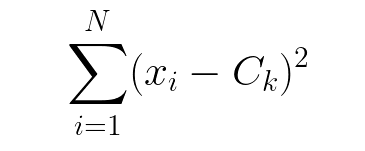

Суть метода локтя заключается в том, что мы строим графики убывания inertia в заисимости от количества кластеров и берем за оптимальное значение такое, при котором произошло последнее сильное уменьшение inertia. Или по другому, которая лежит на "изгибе локтя" графика



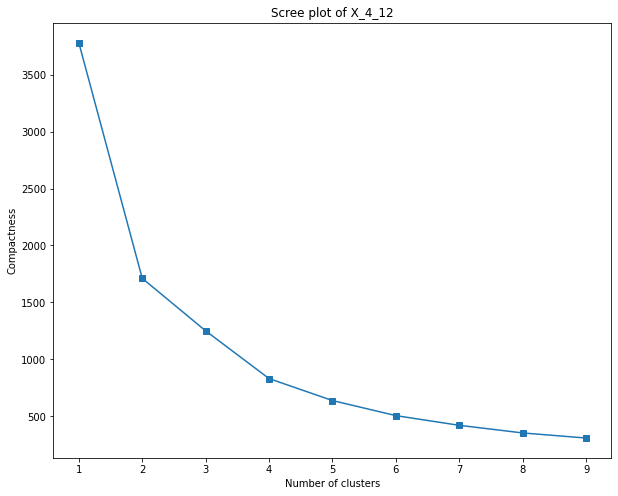

In [74]:
scree_plot(df_x, 'X_4_12')

Для Набора данных "X" оптимальным значением количества кластеров является - 2

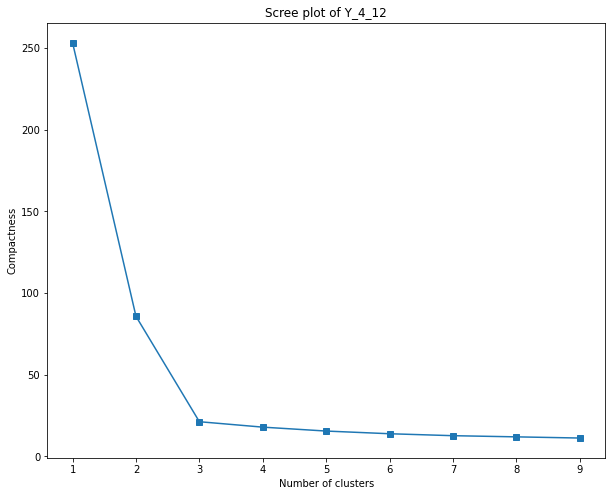

In [75]:
scree_plot(df_y, 'Y_4_12')

Для Набора данных "X" оптимальным значением количества кластеров является - 3

## 3.2 More clusterization metrics

### Davies-Bouldin
The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.

In [271]:
import sklearn
def get_db_score(algos_results: dict, clusters_number: int = 2, distribution:str ="X"):
    data = df_x if distribution == "X" else df_y
    scores = []
    print(f"Davies-Bouldin Score Computation for Clusterization {distribution} into {clusters_number} clusters\n")
    for algo_name, algo_results in algos_results.items():
        score = sklearn.metrics.davies_bouldin_score(data, algo_results)
        scores.append((score, algo_name))
    sorted_scores = sorted(scores, key = lambda x: x[0])
    for score, algo_name in sorted_scores:
        print(f"Davies-Bouldin Score between {algo_name} is {score}")

In [279]:
algorithms_results = {
    "EM": em_clusters_x,
    "Single Linkage": singlelinkage_clusters_x,
    "K Means": k_means_clusters_x,
    "Spectral": spectral_clustering_x,
}
get_db_score(algos_results=algorithms_results, clusters_number=2)

Davies-Bouldin Score Computation for Clusterization X into 2 clusters

Davies-Bouldin Score between EM is 0.8527745431522533
Davies-Bouldin Score between K Means is 0.8980691346574171
Davies-Bouldin Score between Spectral is 0.9562205259515778
Davies-Bouldin Score between Single Linkage is 1.4338573587614427


In [297]:
algorithms_results = {
    "EM": em_clusters_y,
    "Single Linkage": singlelinkage_clusters_y,
    "K Means": k_means_clusters_y,
    "Spectral": spectral_clustering_y,
}
get_db_score(algos_results=algorithms_results, clusters_number=2, distribution="Y")

Davies-Bouldin Score Computation for Clusterization Y into 2 clusters

Davies-Bouldin Score between Single Linkage is 0.4318565131611016
Davies-Bouldin Score between K Means is 0.4318565131611016
Davies-Bouldin Score between EM is 0.5290420893028382
Davies-Bouldin Score between Spectral is 0.5439431306353537


По результам подсчета db score подтвердилось, что Single Linkage лучше всего разбивает Y на два кластера как и предпологалось выше.

In [280]:
algorithms_results = {
    "EM": em_clusters_3_x,
    "Single Linkage": singlelinkage_clusters_3_x,
    "K Means": k_means_clusters_3_x,
    "Spectral": spectral_clustering_3_x,
}
get_db_score(algos_results=algorithms_results, clusters_number=3)

Davies-Bouldin Score Computation for Clusterization X into 3 clusters

Davies-Bouldin Score between K Means is 0.8842720082030527
Davies-Bouldin Score between EM is 0.9990071054400399
Davies-Bouldin Score between Spectral is 1.0482585546405803
Davies-Bouldin Score between Single Linkage is 1.4338573587614427


In [281]:
algorithms_results = {
    "EM": em_clusters_3_y,
    "Single Linkage": singlelinkage_clusters_3_y,
    "K Means": k_means_clusters_3_y,
    "Spectral": spectral_clustering_3_y,
}
get_db_score(algos_results=algorithms_results, clusters_number=3, distribution="Y")

Davies-Bouldin Score Computation for Clusterization Y into 3 clusters

Davies-Bouldin Score between EM is 0.4318565131611016
Davies-Bouldin Score between Single Linkage is 0.4318565131611016
Davies-Bouldin Score between K Means is 0.4318565131611016
Davies-Bouldin Score between Spectral is 0.4318565131611016


### Вывод

Результаты подсчета дополнительной метрики показали валидность предположений сделанных выше, на основе подсчета модуляности и rand score